In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/content/train (1).csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [8]:
new_df = df.dropna()

In [9]:
new_df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [10]:
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Gara

In [11]:
df_model = df[['BedroomAbvGr', 'KitchenQual', 'LotArea', 'ScreenPorch', 'SalePrice']]


In [12]:
df_model.columns = ['bedroom', 'kitchen', 'area', 'location', 'price']

In [13]:
df_model.head()

,bedroom,kitchen,area,location,price
0,3,Gd,8450,0,208500
1,3,TA,9600,0,181500
2,3,Gd,11250,0,223500
3,3,Gd,9550,0,140000
4,4,Gd,14260,0,250000


In [14]:
df_model.info

<bound method DataFrame.info of       bedroom kitchen   area  location   price
0           3      Gd   8450         0  208500
1           3      TA   9600         0  181500
2           3      Gd  11250         0  223500
3           3      Gd   9550         0  140000
4           4      Gd  14260         0  250000
...       ...     ...    ...       ...     ...
1455        3      TA   7917         0  175000
1456        3      TA  13175         0  210000
1457        4      Gd   9042         0  266500
1458        2      Gd   9717         0  142125
1459        3      TA   9937         0  147500

[1460 rows x 5 columns]>

In [15]:
df_model.describe()

,bedroom,area,location,price
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.866438,10516.828082,15.060959,180921.195890
std,0.815778,9981.264932,55.757415,79442.502883
min,0.000000,1300.000000,0.000000,34900.000000
25%,2.000000,7553.500000,0.000000,129975.000000
50%,3.000000,9478.500000,0.000000,163000.000000
75%,3.000000,11601.500000,0.000000,214000.000000
max,8.000000,215245.000000,480.000000,755000.000000


In [16]:
df_model.isnull().sum()

,0
bedroom,0
kitchen,0
area,0
location,0
price,0


In [17]:
print(df_model.columns)


Index(['bedroom', 'kitchen', 'area', 'location', 'price'], dtype='object')


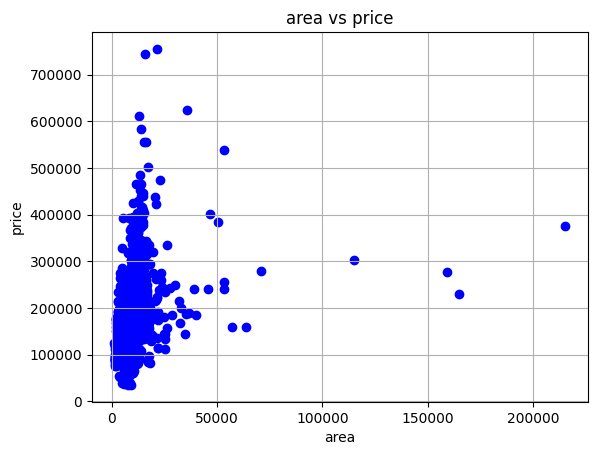

In [18]:
plt.scatter(df_model['area'], df_model['price'], color='blue')
plt.title('area vs price')
plt.xlabel('area')
plt.ylabel('price')
plt.grid(True)
plt.show()

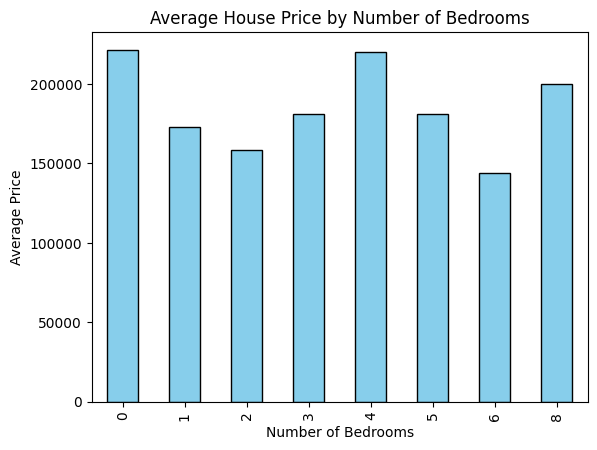

In [19]:
bedroom_price = df.groupby('BedroomAbvGr')['SalePrice'].mean().sort_index()
bedroom_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average House Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

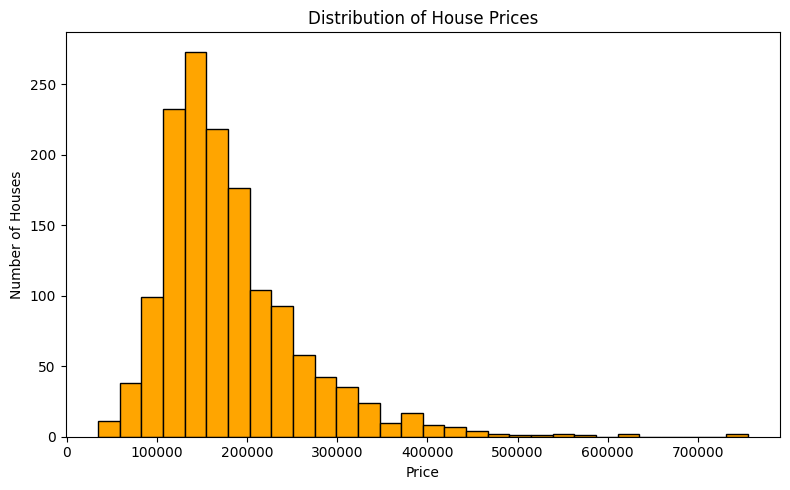

In [20]:
plt.figure(figsize=(8,5))
plt.hist(df['SalePrice'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Number of Houses')
plt.tight_layout()
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
df_model['kitchen_encoded'] = df_model['kitchen'].map({
    'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
})
median_price = df_model['price'].median()
df_model['price_class'] = (df_model['price'] > median_price).astype(int)

X = df_model[['bedroom', 'kitchen_encoded', 'area', 'location']]
y = df_model['price_class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-31-3512831350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['kitchen_encoded'] = df_model['kitchen'].map({
/tmp/ipython-input-31-3512831350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['price_class'] = (df_model['price'] > median_price).astype(int)


In [22]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1168, 4)
X_test shape: (292, 4)
y_train shape: (1168,)
y_test shape: (292,)


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [34]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.863013698630137
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       161
           1       0.82      0.89      0.85       131

    accuracy                           0.86       292
   macro avg       0.86      0.87      0.86       292
weighted avg       0.87      0.86      0.86       292



In [35]:
y_pred = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
y_pred

array([-198215.6818042 ,  -83839.4048115 , -215053.54411318,
       -198216.18328221,   13698.45962717, -231892.58373506,
        -83838.90480237, -198216.58281946, -231892.51836959,
       -197641.91427056, -198215.99350201, -198215.46969692,
       -215052.21623936,  -83839.71107443, -198215.73336213,
       -100677.83690173,  -83839.99412895, -215053.83201502,
       -215053.6464946 ,  -83839.63851141, -198214.98981155,
        -83839.88308109,  -83839.93698924, -214708.28672421,
        -83839.88058398, -100677.98834397,  -83839.89791685,
       -215052.04908003, -198215.32559911, -100678.52625038,
       -198215.82516757,  -83839.64438696,   30537.15597017,
       -215053.6153542 ,  -83839.22193507, -198215.56634969,
       -198215.86012708,  -67002.05808184,  -50163.18415041,
       -215052.99445568, -198216.00114023,  -83839.90070774,
       -198215.48438579,   30536.37364097, -198215.45691761,
       -278915.29115352, -215053.71450407, -198215.7805134 ,
         30536.48733282,

In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: -105713542503.3946


In [38]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 145295.0852559809


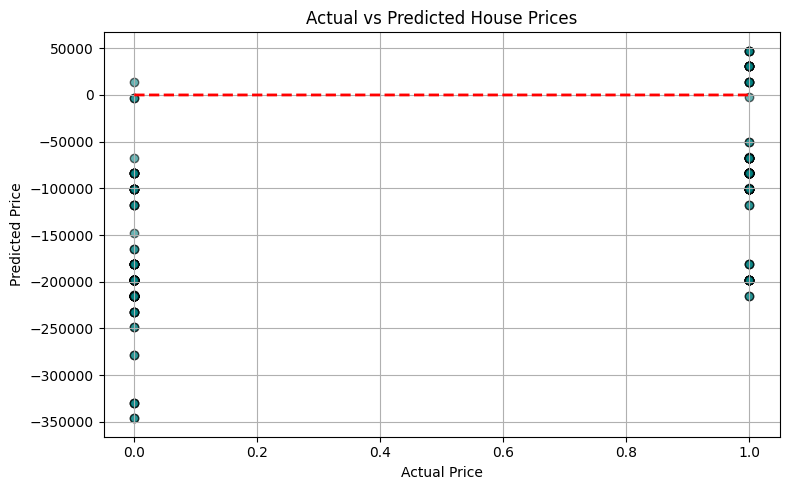

In [39]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.tight_layout()
plt.show()